In [1]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 更新 Gaussian_graphs.pkl 文件的正确路径
dtw_graphs_path = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\15days\30min\Gaussian_graphs.pkl"

# 读取 pkl 文件
with open(dtw_graphs_path, 'rb') as f:
    merged_graphs = pickle.load(f)

# 获取原始的节点索引
original_node_indices = list(merged_graphs.nodes())

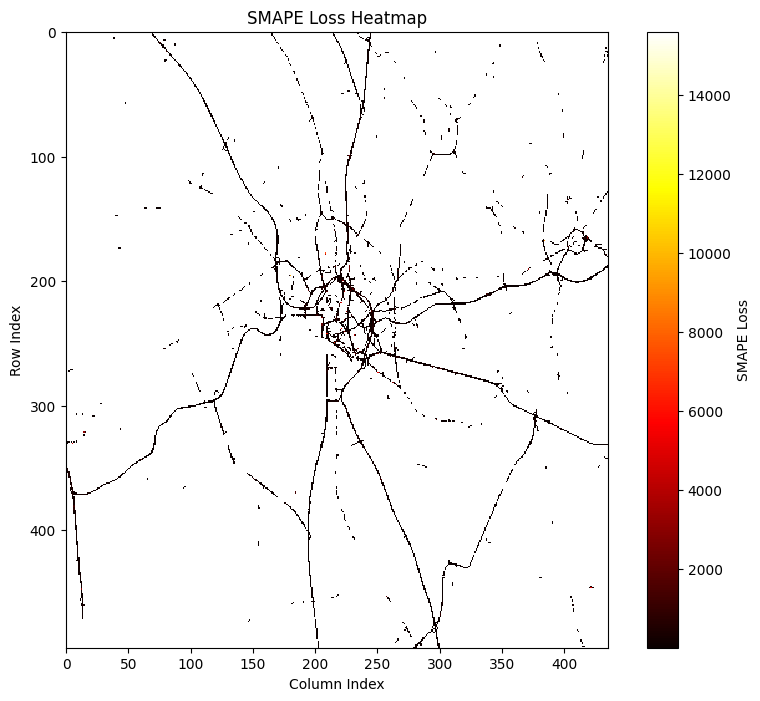

In [3]:
# 更新 CSV 文件路径
node_loss_csv_path = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\15days\30min\node_losses.csv"

# 读取 CSV 文件
df_loss = pd.read_csv(node_loss_csv_path)

# 提取第一列（扁平化索引）和第六列（SMAPE）
flat_indices = df_loss.iloc[:, 0].values  # 0-5511 的索引
smape_values = df_loss.iloc[:, 1].values  # SMAPE

# 创建索引映射（扁平索引 -> 原始索引）
index_mapping = {i: original_node_indices[i] for i in range(len(original_node_indices))}

# 转换扁平索引为原始索引
original_indices_mapped = [index_mapping[i] for i in flat_indices]

# 逆扁平化回 (row, column) 形式
rows, cols = 495, 436
original_coords = [(idx // cols, idx % cols) for idx in original_indices_mapped]

# 创建空的 495x436 图，用 NaN 作为默认值
heatmap = np.full((rows, cols), np.nan)

# 填充 SMAPE 值
for (r, c), smape in zip(original_coords, smape_values):
    heatmap[r, c] = smape

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label="SMAPE Loss")
plt.title("SMAPE Loss Heatmap")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()


In [4]:
def load_variable(filepath):
    """
    从文件中加载变量。

    参数:
        filepath (str): 文件的完整路径。
    
    返回:
        从文件中加载的变量。
    """
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
    return data

def readdata(filepath):
    """
    读取数据文件并转换为 NumPy 数组。

    参数:
        filepath (str): 文件的完整路径（包括文件名和扩展名）。
    
    返回:
        NumPy 数组表示的数据。
    """
    # 从文件中加载数据
    data = load_variable(filepath)
    
    # 转换为 NumPy 数组
    data = np.array(data)
    
    # 输出数据形状
    print(f"Loaded data shape: {data.shape}")
    return data

Loaded data shape: (180, 495, 436)


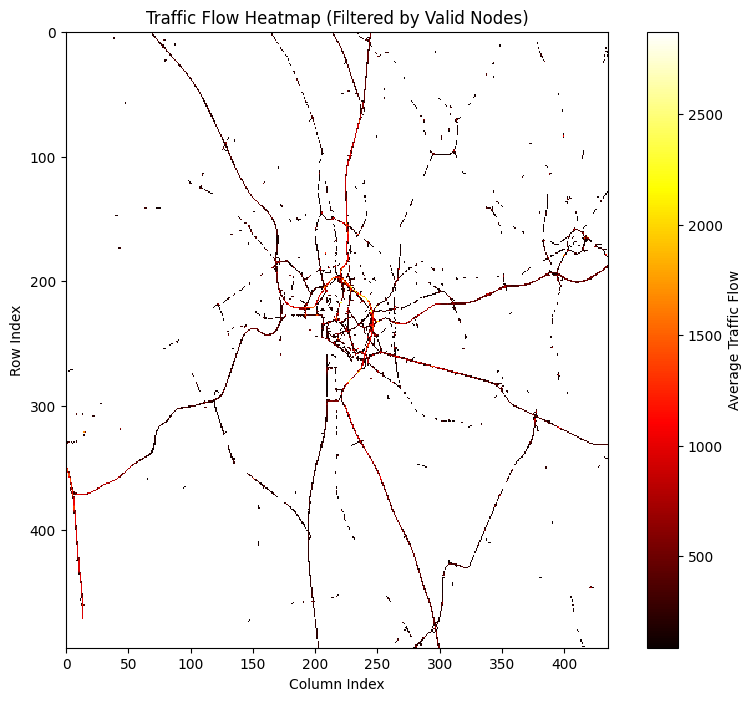

In [5]:
# 读取提供的 .txt 交通流数据文件
march_filepath = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\2019 samples for gray map\Antwerp_2019_samples_30min_timesteps.txt"
# 加载数据，假设数据存储格式为 NumPy 数组
traffic_data = readdata(march_filepath).reshape(180, 495, 436)  # 形状 (180, 495, 436)

# 计算第 0 维（时间维度）的均值
traffic_avg = np.mean(traffic_data, axis=0)  # 结果形状为 (495, 436)

# 仅在有效节点处绘制热力图（有效节点的坐标从之前计算得到）
filtered_traffic = np.full((495, 436), np.nan)  # 先用 NaN 填充无效区域

# 仅填充有效节点的值
for (r, c) in original_coords:
    filtered_traffic[r, c] = traffic_avg[r, c]

# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(filtered_traffic, cmap='hot', interpolation='nearest')
plt.colorbar(label="Average Traffic Flow")
plt.title("Traffic Flow Heatmap (Filtered by Valid Nodes)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()
